Regresyon
* İki ya da daha çok değişken arasındaki ilişkiyi ölçekmek için kullanılır.
* Eğer tek değişken kullanılarak analiz yapılıyorsa bu tek değişkenli, birden çok değişken kullanılarak analiyiz yapılıyorsa çok değişkenli regresyon analizi olarak isimlendirilir.
* Gözetimli öğrenme yöntemlerindendir.

Regresyon Çeşitleri:
* Doğrusal Regresyon
* Çoklu Doğrusal Regresyon
* Polinomsal Regresyon

Basit Doğrusal Regresyon Nedir?
* iki değişken arasındaki ilişkiyi tanımlamak için kullanılan doğrusal bir modelin yaklaşımıdır.

Denklem: y = β0 + β1*x + ϵ

* β0: Doğrunun y-eksenini kestiği yer ve regresyon sabitidir. (x=0)
* β1: Doğrunun eğimi veya regresyon katsayısıdır.
* ϵ: Rastgele hata değeridir.

Amaç:
* Ortalama karesel hatayı ((Mean Squared Error(MSE))) minimize edecek şekilde, veri üzerinde doğrusal bir çizgi çizmektir. Burada x=1 için y=6 olması gerekirken çizilen doğruda y=5 olduğunda
    * Veri setindeki gerçek değerler(y=6) ile tahmin edilen değerleri(y=5) arasındaki farkların karelerinin toplamı alınarak sonuç örnek sayıya bölünür.
    * Kare almak; büyük hataları yani 0'dan uzaklaştığında cezalndırır, küçük hataları yani  0'a yaklaştıkça ödüllendirir.


In [28]:
# Kütüphaneyi içe aktar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Sklearn kütüphanesini içe aktar
from sklearn import linear_model

from sklearn.metrics import r2_score


In [6]:
# veriyi içe aktar
df=pd.read_csv("data/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.columns #kolonlar 

#price: fiyat
#area: yüzölçüme
#bedrooms: yatak odası
#bathrooms: banyo
#mainroad:ana yol
#guestroom: misafir odası
#basement: bodrum
#hotwaterheating: sıcak su ısıtma
#airconditioning: klima
#parking: otopark
#prefarea: prefabrik
#furnishingstatus:mobliya durumu:
#(furnished: mobilyalı, semi-furnished: yarı mobilyalı, unfurnished: mobilyasız)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
df.info() #veri hakkında bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
df.shape #satir-sütun sayısı

(545, 13)

Veri Ön İşleme: 
-   Veri setindeki kategorik (nominal) değişkenlerin sayısal değerlere dönüştürülmesi için:
    - "yes" ve "no" gibi kategorik değerler, 1 ve 0 gibi sayısal değerlerle, 
    - aynı şekilde "furnished", "semi-furnished" ve "unfurnished" gibi değerler de sırasıyla 2, 1 ve 0 sayısal değerlerle temsil edilmiştir.

In [12]:
#yes: 1, no: 0
#furnished: 2, semi-furnished:1, unfurnished:0

df['mainroad'] = df['mainroad'].replace({'yes':1,'no':0}).astype(int)
df['guestroom'] = df['guestroom'].replace({'yes':1,'no':0}).astype(int)
df['basement'] = df['basement'].replace({'yes':1,'no':0}).astype(int)
df['hotwaterheating'] = df['hotwaterheating'].replace({'yes':1,'no':0}).astype(int)
df['airconditioning'] = df['airconditioning'].replace({'yes':1,'no':0}).astype(int)
df['prefarea'] = df['prefarea'].replace({'yes':1,'no':0}).astype(int)
df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished':2,'semi-furnished':1, 'unfurnished':0 }).astype(int)


In [13]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [21]:
house_df = df[['area','bedrooms','parking', 'furnishingstatus', 'hotwaterheating', 'price']]

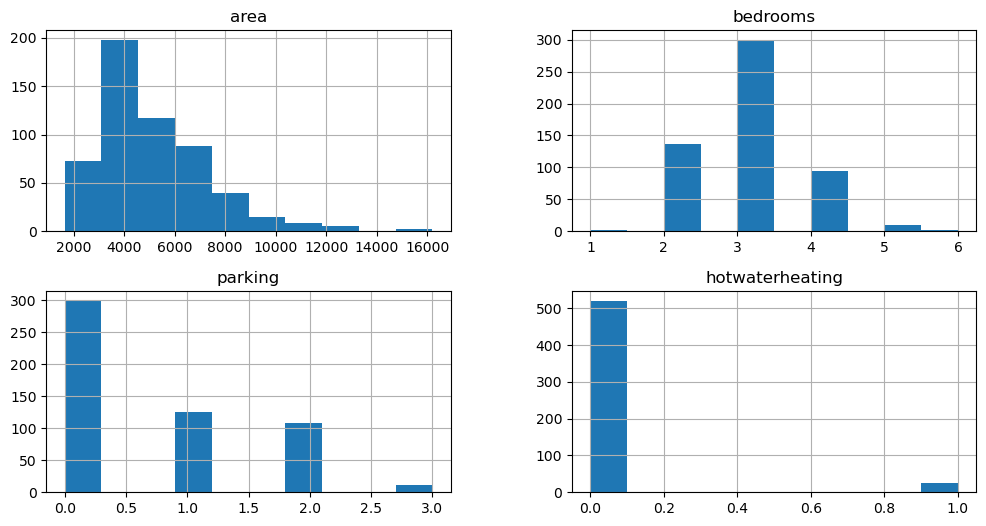

In [14]:
plt.rcParams['figure.figsize']= (12, 6)
viz=df[['area', 'bedrooms', 'parking','hotwaterheating' ]]
viz.hist()
plt.show()

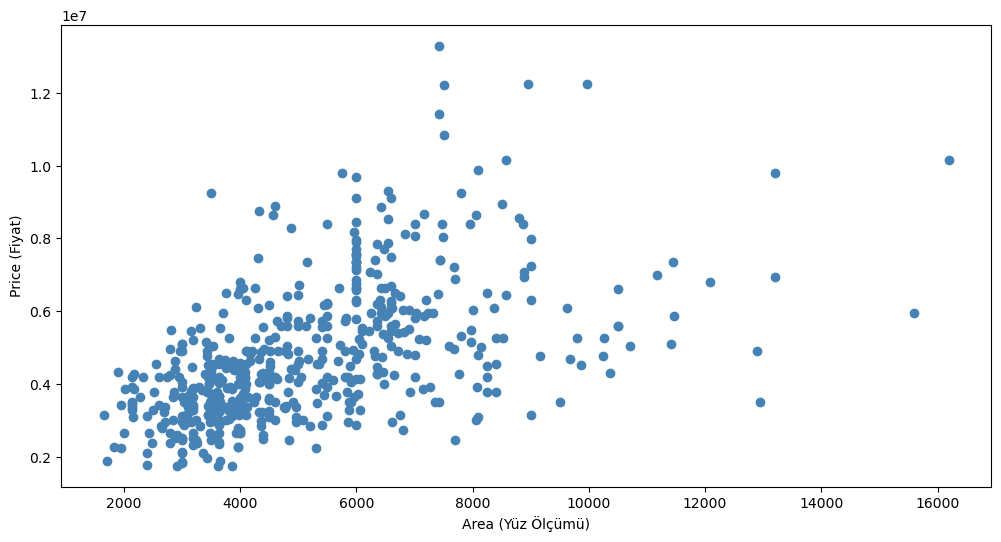

In [15]:
plt.scatter(df.area, df.price, color="steelblue")
plt.xlabel("Area (Yüz Ölçümü)")
plt.ylabel("Price (Fiyat)")
plt.show()

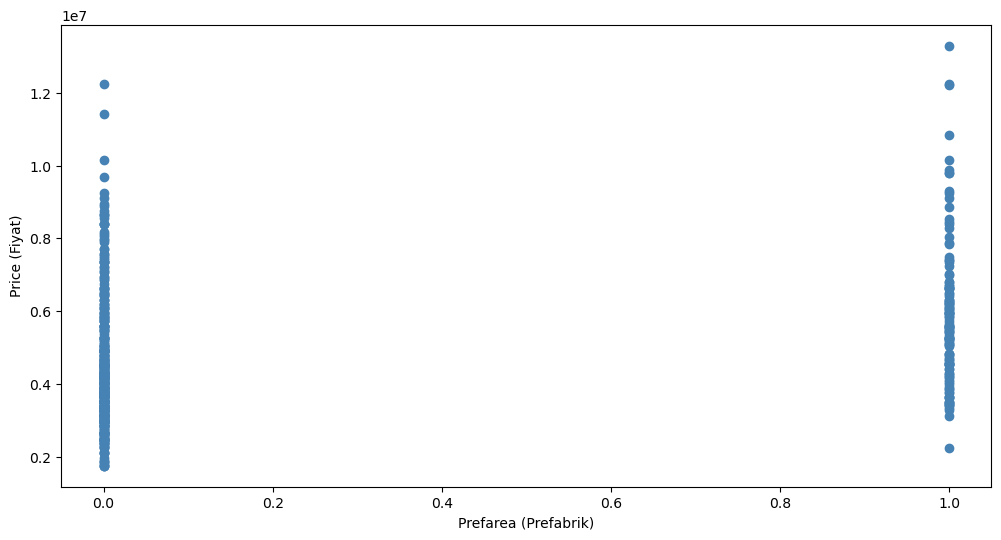

In [16]:
plt.scatter(df.prefarea, df.price, color="steelblue")
plt.xlabel("Prefarea (Prefabrik)")
plt.ylabel("Price (Fiyat)")
plt.show()

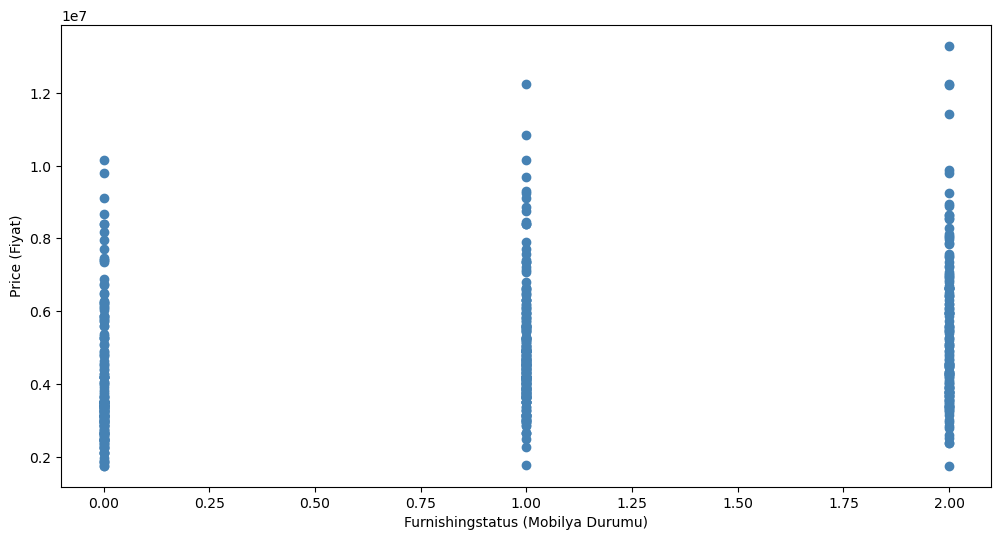

In [17]:
plt.scatter(df.furnishingstatus, df.price, color="steelblue")
plt.xlabel("Furnishingstatus (Mobilya Durumu)")
plt.ylabel("Price (Fiyat)")
plt.show()

<Axes: xlabel='area', ylabel='price'>

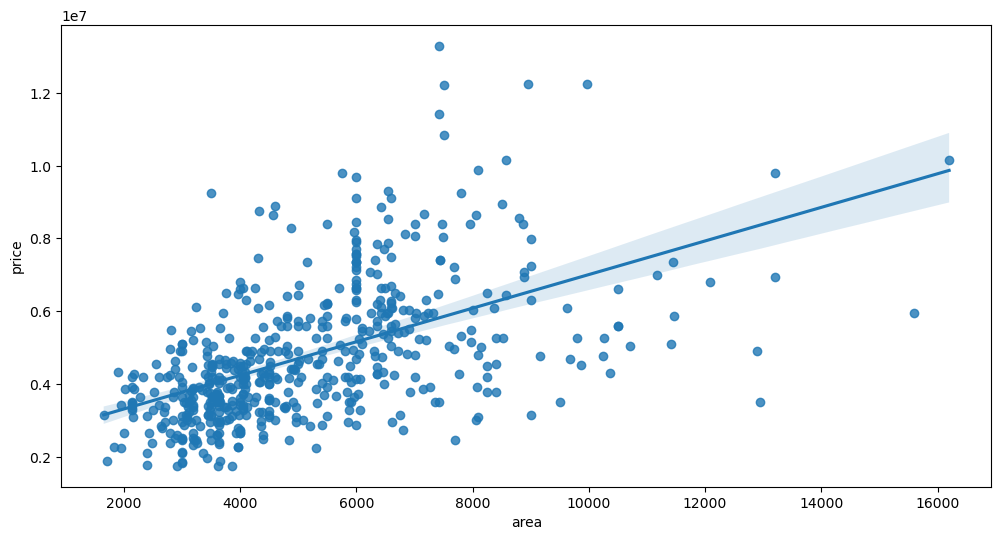

In [19]:
sns.regplot(x=df['area'], y=df['price'])

In [22]:
# train ve test olarak ayırma
msk = np.random.rand(len(df)) < 0.8

# True değerlere sahip olan örnekleri içeren eğitim veri setini oluşturur. 
# Yani, rastgele seçilen örneklerin %80'ini içerir.
train = house_df[msk]

# False değerlere sahip olan örnekleri içeren test veri setini oluşturur. 
# Yani, rastgele seçilen örneklerin %20'sini içerir.
test = house_df[~msk]

In [23]:
house_df.head(10)

,area,bedrooms,parking,furnishingstatus,hotwaterheating,price
0,7420,4,2,2,0,13300000
1,8960,4,3,2,0,12250000
2,9960,3,2,1,0,12250000
3,7500,4,3,2,0,12215000
4,7420,4,2,2,0,11410000
5,7500,3,2,1,0,10850000
6,8580,4,2,1,0,10150000
7,16200,5,0,0,0,10150000
8,8100,4,2,2,0,9870000
9,5750,3,1,0,0,9800000


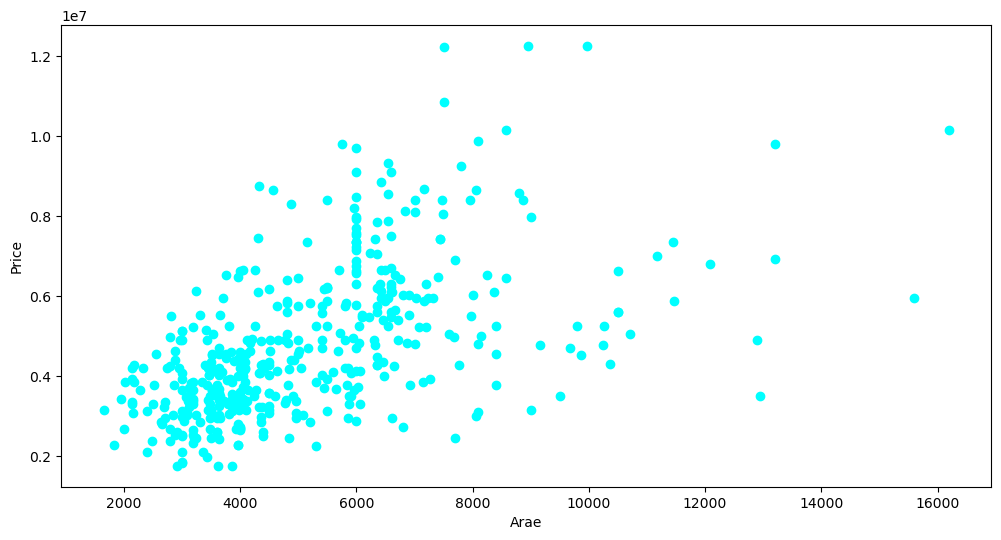

In [24]:
plt.scatter(train.area, train.price, color="cyan")
plt.xlabel("Arae")
plt.ylabel("Price")
plt.show()

In [26]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['area']])
train_y = np.asanyarray(train[['price']])

regr.fit(train_x, train_y)

LinearRegression()

In [27]:
print(regr.coef_) # β1
print(regr.intercept_) # β0

[[463.1992957]]
[2382876.02218259]


In [29]:
test_x = np.asanyarray(test[['area']])
test_y = np.asanyarray(test[['price']])
test_y_ = regr.predict(test_x)

In [30]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 1121498.27
Residual sum of squares (MSE): 2611670438660.96
R2-score: 0.25
